# MBA FIAP Inteligência Artificial & Machine Learning

## Visão Computacional: Análise de Imagens Médicas

## 1. Introdução

As tecnologias de imagens médicas estão cada vez mais integradas aos sitemas de visão computacional, incluindo as imagens de raio-x.

Modelos de equipamentos modernos geram imagens digitais deste tipo de exame, proporcionando análises mais completas e menos _ad-hoc_, com isso algumas pré-análises podem ser realizadas por aplicações baseadas em inteligência artificial para confirmar ou sugerir diagnósticos ao profissional responsável pelo exame.

No campo dos diagósticos por raios-x, a pnenumonia é uma das enfermidades onde seu uso é um dos mais aplicados para determinar o curso de tratamento.

<p align="center">
    <img src="imagens/NORMAL2-IM-1422-0001.jpeg">
</p>

## 2. Instruções

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas.

Por meio de uma trilha guiada, iremos constuir um modelo que seja capaz de classificar imagens de raio-x para determinar se a determinada pessoa está com alguma condição que necessita maiores cuidados.

De acordo com as imagens disponíveis para o treinamento e validação, será de critério do grupo selecionar as quantidades ideais ou até mesmo pré-processar as imagens para obter o melhor resultado, nos principais indicadores de performance, como precisão, sensibilidade e pontuação F1.

Este projeto poderá ser feita por grupos de até 4 pessoas.
Caso este projeto seja substitutivo, deverá ser realizado por apenas uma pessoa.

| Nome dos Integrantes     | RM            | Turma  |
| :----------------------- | :------------ | :----: |
| Guilherme Machado        | RM 335783     | `11IA` |
| Leonardo Souza           | RM 335491     | `11IA` |

Por ser um projeto guiado, fique atento quando houver as marcações **Implementação** indica que é necessário realizar alguma implementação em Python no bloco a seguir onde há a inscrição ```##IMPLEMENTAR``` e **Resposta** indica que é esperado uma resposta objetiva relacionado a algum questionamento. 

**Cada grupo pode utilizar nas respostas objetivas quaisquer itens necessários que enriqueçam seu ponto vista, como gráficos, fotos e, até mesmo, trechos de código-fonte.**

Pode-se utilizar quantos blocos forem necessários para realizar determinadas implementações ou utilizá-las para justificar as respostas. Não é obrigatório utilizar somente o bloco indicado.

Ao final não se esqueça de subir os arquivos do projeto nas contas do GitHub de cada membro, ou subir na do representante do grupo e os membros realizarem o fork do projeto.

A avaliação terá mais ênfase nos seguintes tópicos de desenvolvimento do projeto:
 
1. __Pré-Processamento__
2. __Classificação__
3. __Performance__
4. __Conclusões Finais__

## 3.1 Detalhe do problema: a pneunomia

Fonte: [artigo](https://drauziovarella.uol.com.br/doencas-e-sintomas/pneumonia) do Dr. Drauzio Varella.

Pneumonias são infecções que se instalam nos pulmões, órgãos duplos localizados um de cada lado da caixa torácica. Podem acometer a região dos alvéolos pulmonares onde desembocam as ramificações terminais dos brônquios e, às vezes, os interstícios (espaço entre um alvéolo e outro).

Basicamente, pneumonia é provocada pela penetração de um agente infeccioso ou irritante (bactérias, vírus, fungos e por reações alérgicas) no espaço alveolar, onde ocorre a troca gasosa. Esse local deve estar sempre muito limpo, livre de substâncias que possam impedir o contato do ar com o sangue.

Exame clínico, auscultação dos pulmões e radiografias de tórax são recursos essenciais para o diagnóstico de pneumonia.

<p align="center">
    <img src="imagens/pneumonia.jpeg">
</p>

## 3.2 Diagnóstico por raio-x

O exame de raio-x traz diferenças em cada tipo de diagnóstico, sendo considerado os seguintes grupos de análise: **normal** (ou controle) onde não há nenhuma condição de infeção, **bacterial pneumonia** (pneumonia bacteriana) que representa a condição de infecção bacteriana e **viral pneumonia** que indica a condição de infecção vira. 

<p align="center">
<img src="imagens/raiox.png" height="60%" width="60%">
</p>

As imagens de controle não são mais brancas ao centro que é onde fica o coração. Já nas imagens com pneumonia é possível notar regiões brancas ao redor dos pulmões, que é como o exame identifica as secreções responsáveis pela infeçcão.

Quando mais regiões brancas ao redor do pulmão mais severa é a inflamação e menos se observa dos detalhes dos pulmões, ficando um pouco esmaecido diante desta condição.

## 4.1 Problema

Construir um classificador utilizando _transfer learning_ para identificar as seguintes classes: **controle**, **pneumonia bacteriana** e **pneumonia viral**.

Para construir este classificador, utilize o dataset do [Kaggle Chest Ray Pneumonia](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia) e organize os dados de forma a separar em cada uma das classes que já estão definidas no diretório ```raiox```, sendo ```controle``` para as imagens normais (sem inflamação), ```bacteria``` para as imagens de pneumonia bacteriana e ```viral``` para as imagens de pneumonia viral.

Determine a quantidade de imagens a serem treinadas e validadas. Utiliza pelo menos, 100 imagens para cada classe.

Compare os resultados com pelo menos 3 classificadores, obtendo os valores de **precisão (precision)**, **sensibilidade (recall)** e **pontuação F1 (F1 Score)**. No guia abaixo, foi indicado os seguintes modelos: ResNet50, VGG16 e VGG19. 

>Importante: a escolha do número de imagens devem ser o suficiente para alcançar o valor de **precisão** mínima de 70%.

A construção do modelo será utilizada o framework Keras.

**Pergunta**: Qual o número de imagens que foram selecionadas para cada classe?

**Resposta**:

Controle - 1583 imagens

Bacteria - 2349 imagens

Viral - 1354 imagens

## 4.2 Componentes obrigatórios

Este projeto requer a instalação dos seguintes componentes, via ```conda install```:

* Keras
* Tensorflow
* Pillow
* Matplotlib

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.applications import VGG16, VGG19
from keras.applications import Xception
from keras.applications import InceptionResNetV2
from keras.applications.xception import preprocess_input
from keras.applications.resnet50 import preprocess_input
from keras.applications.vgg16 import preprocess_input
from keras.applications.inception_resnet_v2  import preprocess_input
from keras import Model, layers
from keras.models import load_model, model_from_json

import keras.backend as K

Using TensorFlow backend.


## 4.3 Carregando imagens de treinamento e validação

Selecione a melhor divisão entre dados de treinamento e validação. O número deverá ser representado em número fracionário, 5% equivale a 0.05, por exemplo.

In [2]:
import os

classes = ['controle','pneumonia_bacteriana','pneumonia_viral']

def create_paths():
    try: 
        os.mkdir('raiox')
        for name in classes: 
            os.mkdir('raiox' + '/' + name)
    except: 
        print ("Diretorios ja foram criados")

In [3]:
create_paths()

Diretorios ja foram criados


In [4]:
def get_paths(path): 
    firstpath  = []
    secondpath = [] 
    thirdpath =  [] 
    lista_de_diretorios = os.listdir(path)
    for dirname in lista_de_diretorios: 
        name = os.listdir(path + '/' + dirname)
        firstpath.append(path + '/' + dirname)
        for classe in name: 
            full = os.listdir(path + '/' + dirname + '/' + classe)
            secondpath.append(path + '/' + dirname + '/' + classe)
            for acesspoint in full:
                thirdpath.append(path + '/' + dirname + '/' + classe + '/' + acesspoint)
    return thirdpath

In [5]:
allpaths =  get_paths('Source')

In [6]:
import shutil
import os 
def migrar_imagens(paths): 
    if 'virus' in paths: 
        if os.path.getsize(paths) > 40000:
            fixdestino = 'raiox/pneumonia_viral'
            shutil.copy(paths, fixdestino)
    elif 'bacteria'in paths:
        if os.path.getsize(paths) > 40000:
            fixdestino = 'raiox/pneumonia_bacteriana'
            shutil.copy(paths, fixdestino)
    else:
        if os.path.getsize(paths) > 40000:
            fixdestino = 'raiox/controle'
            shutil.copy(paths, fixdestino)

In [7]:
for path in allpaths: 
    migrar_imagens(path)

In [8]:
## IMPLEMENTE
divisao_treino_validacao = 0.3

In [9]:
train_datagen = ImageDataGenerator(validation_split=divisao_treino_validacao)

train_generator = train_datagen.flow_from_directory(
    "raiox",
    batch_size=32,
    class_mode="categorical",
    color_mode="rgb",
    target_size=(224,224),
    subset="training")

Found 3702 images belonging to 3 classes.


In [10]:
val_generator = train_datagen.flow_from_directory(
    "raiox",
    batch_size=32,
    class_mode="categorical",
    color_mode="rgb",
    target_size=(224,224),
    subset="validation")

Found 1584 images belonging to 3 classes.


In [11]:
train_generator.class_indices, val_generator.class_indices

({'controle': 0, 'pneumonia_bacteriana': 1, 'pneumonia_viral': 2},
 {'controle': 0, 'pneumonia_bacteriana': 1, 'pneumonia_viral': 2})

## 4.4 Modelos de transfer learning

O Keras já possui classes especializadas para os seguintes modelos de deep-learning treinados com o conjunto de dados [ImageNet](http://www.image-net.org/):
  
* Xception
* VGG16
* VGG19
* ResNet50
* InceptionV3
* InceptionResNetV2
* MobileNet
* DenseNet
* NASNet
* MobileNetV2

Mais detalhes, veja na [documentação do Keras](https://keras.io/applications/).

Para este estudo, vamos utilizar para avaliação as seguintes arquiteturas: RestNet50, VGG15 e VGG19.

## 4.5 Indicadores de desempenho

O Keras não possui os indicadores de desempenho como precisão, sensibilidade e pontuação f1 por padrão, portanto precisamos implementar externamente.

In [12]:
def recall_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

### 4.5.1 Arquitetura ResNet50

**Pergunta**: Explique como é constituída a arquitetura do ResNet50? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**:

A arquitetura do ResNet50 possui 50 camadas, composta por blocos residuais. A arquitetura da rede neural profunda ResNet50 possui duas caracteristicas: 

* Estratégia de “atalhos” ou “conexões de salto” que pulam pares de grupos de camadas convolucionais.
* Foco na normalização dos lotes com batch normalization 

Cada bloco possui uma entrada X que passa por operações de convolução relu. Porém antes de cada convolução, o X de entrada é apresentado juntamente do X residual das operaçõess do bloco residual. O diagrama abaixo reforça esta característica: 

<p align="center">
    <img src="imagens/resnet-3.png">
</p>

Sendo assim, a proposta desta rede é otimizar a regularização do X e mitigar a degradação da rede pelo desaparecimento dos gradientes.

A topologia da ResNet50 é composta por: 

* Input: Camada de entrada com pad de 3X3 
* Stage 1: Camada 2D de convolução com 64 filtros, com tamanho 7X7 e utiliza o espaco de 2x2. Após o input ser processado é aplicado o batch normalization. E temos uma camada de Maxpooling 3x3 e com espaço de 2x2. 
* Stage 2: O bloco de convolução usa 3 grupos de filtros com tamanho 64x64x256.
* Stage 3: O bloco de convolução usa 3 grupos de filtros com tamanho 128x128x512.
* Stage 4: O bloco de convolução usa 3 grupos de filtros com tamanho 256x256x1024.
* Stage 5: O bloco de convolução usa 3 grupos de filtros com tamanho 512x512x2048. 
* Output: Usa uma camada 2D com janela de Pooling do tamanho 2x2, possui o nome de "avg_pool". Após isto, temos uma camanda densa conectada com os layers reduzindo os inputs que são feitos pelas classes usando a função de ativação softmax. 

<p align="center">
    <img src="imagens/topologia_resnet_50.jpeg">
</p>

O modelo ResNet50 foi o vencedor do ImageNet de 2015. Ela é indicada para reconhecimento de imagens. Por conta dos seus 23 milhões de parâmetros ela possui uma excelente performance de generalização e uma taxa baixa de erros nesse tipo de tarefa.

Fonte: http://www.lapix.ufsc.br/ensino/visao/visao-computacionaldeep-learning/deep-learningreconhecimento-de-imagens/

Fonte: https://towardsdatascience.com/residual-networks-resnets-cb474c7c834a

A técnica de transfer learning consiste de utilizar o mesmo modelo e treiná-lo para outas imagens. Por tal motivo, excluímos a última camada para modelar com as classes que definimos, ou seja, **controle**, **bacteriana** e **viral**.

Informe a quantidade de classes a serem classificadas.

In [3]:
## IMPLEMENTE
qtde_classes = 3

In [14]:
conv_base = ResNet50(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

C:\Users\leonardo\anaconda3\envs\cvia\lib\site-packages\keras_applications\resnet50.py:263: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [15]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [16]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

O número de épocas define quantas vezes o modelo irá treinar e validar o erro, assim ajustando os pesos para melhor convergência.
Escolha o número adequado de épocas para alcançarmos pelo menos **70% de precisão de validação**.

In [14]:
## IMPLEMENTE

qtde_epocas = 25

In [18]:
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)

Epoch 1/25
5/5 [==============================] - 95s 19s/step - loss: 0.9435 - precision_score: 0.6729 - recall_score: 0.4813 - f1_score: 0.5533 - val_loss: 1.9354 - val_precision_score: 0.2739 - val_recall_score: 0.2727 - val_f1_score: 0.2733
Epoch 2/25
5/5 [==============================] - 46s 9s/step - loss: 0.7519 - precision_score: 0.6672 - recall_score: 0.6250 - f1_score: 0.6449 - val_loss: 0.9581 - val_precision_score: 0.5900 - val_recall_score: 0.4937 - val_f1_score: 0.5368
Epoch 3/25
5/5 [==============================] - 27s 5s/step - loss: 0.5954 - precision_score: 0.7675 - recall_score: 0.7375 - f1_score: 0.7519 - val_loss: 2.2401 - val_precision_score: 0.2648 - val_recall_score: 0.2645 - val_f1_score: 0.2647
Epoch 4/25
5/5 [==============================] - 16s 3s/step - loss: 0.5721 - precision_score: 0.7814 - recall_score: 0.7375 - f1_score: 0.7582 - val_loss: 1.3330 - val_precision_score: 0.3820 - val_recall_score: 0.3687 - val_f1_score: 0.3751
Epoch 5/25
5/5 [=======

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

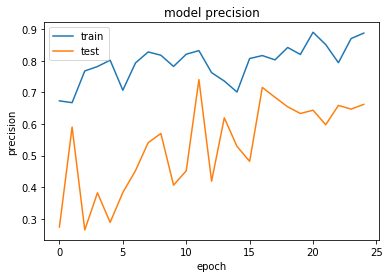

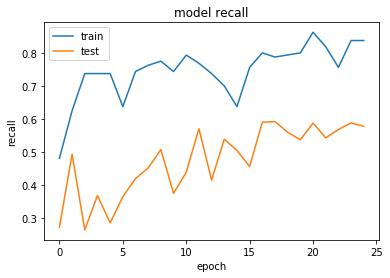

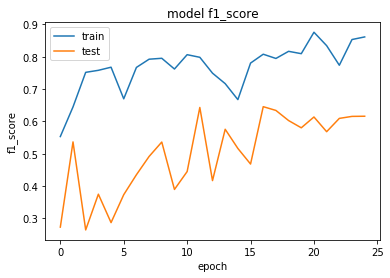

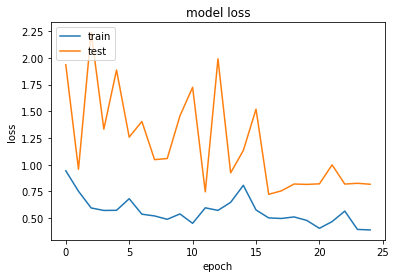

In [19]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**: Neste caso mesmo após 25 épocas, o modelo não converge. Já que a perda (loss) do teste subiu e os demais indicadores de precisão do teste caíram. Dentro de um modelo bem sucedido, a perda (loss) deve descender e os demais ascender. 

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

**Resposta**: os valores de validação são: 
* val_precision_score: 66,18% 
* val_recall_score: 57,77% 
* val_f1_score: 61,62%


### 4.5.2 Arquitetura VGG16

**Pergunta**: Explique como é constituída a arquitetura do VGG16? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**: A VGG16 é composta por 16 camadas decrescente, as convoluções são compostas por tamanho 3x3 com muitos filtros aplicados camada por camada. Com a VGG16 é possível extrair bem as caracteristicas das imagens processadas, o que torna uma rede neural profunda muito utilizada para identificar as características para outros modelos.

A arquitetura VGG é caracterizada pela sua simplicidade e tem como base a arquitetura AlexNet. A topologia da rede VGG16 é composta por: 

* 13 camadas de convoluções extraindo as características das imagens
* 3 camadas totalmente conectadas para a classificação das imagens

<p align="center">
    <img src="imagens/VGG16-1.png">
</p>

Uma breve comparação com a AlexNet, a VGG16 faz uso das camadas de convoluções com filtros de tamanho menores 3x3. Enquanto na AlexNet temos filtros de 11 e 5 nas duas primeiras convoluções como podemos ver abaixo:

<p align="center">
    <img src="imagens/AlexNet-1.png">
</p>

A VGG16 fez melhorias em cima da arquitetura AlexNet e ficou conhecida pelos bons resultados no ImageNet de 2014 ficando no Top 5. Ela é muito utilizada para problemas de classificação de imagens. 

In [4]:
conv_base = VGG16(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

In [5]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [6]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [15]:
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)

Epoch 1/25
5/5 [==============================] - 18s 4s/step - loss: 2.7329 - precision_score: 0.4125 - recall_score: 0.4125 - f1_score: 0.4125 - val_loss: 2.0338 - val_precision_score: 0.4492 - val_recall_score: 0.4318 - val_f1_score: 0.4402
Epoch 2/25
5/5 [==============================] - 15s 3s/step - loss: 1.3366 - precision_score: 0.6544 - recall_score: 0.6063 - f1_score: 0.6289 - val_loss: 1.3604 - val_precision_score: 0.6258 - val_recall_score: 0.5947 - val_f1_score: 0.6096
Epoch 3/25
5/5 [==============================] - 15s 3s/step - loss: 1.2601 - precision_score: 0.6406 - recall_score: 0.6000 - f1_score: 0.6194 - val_loss: 1.2287 - val_precision_score: 0.6439 - val_recall_score: 0.6067 - val_f1_score: 0.6245
Epoch 4/25
5/5 [==============================] - 16s 3s/step - loss: 1.1590 - precision_score: 0.6478 - recall_score: 0.6312 - f1_score: 0.6392 - val_loss: 1.5482 - val_precision_score: 0.6135 - val_recall_score: 0.6023 - val_f1_score: 0.6078
Epoch 5/25
5/5 [========

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

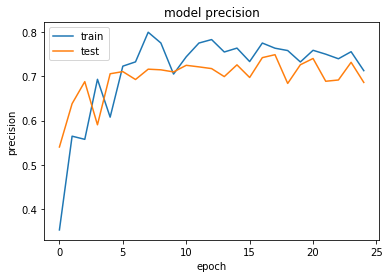

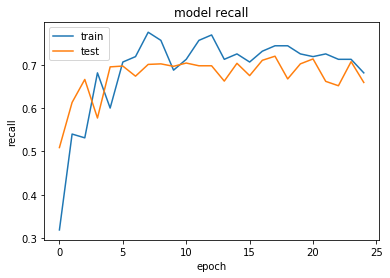

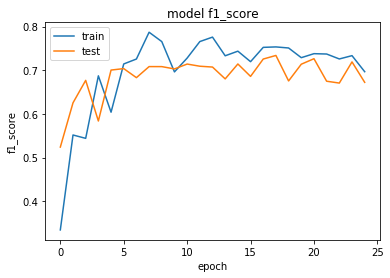

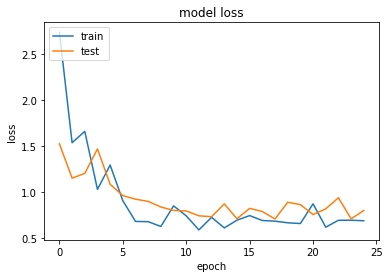

In [24]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**: Neste caso o modelo converge tanto no treino quanto nos testes. A perda (loss) diminui ao longo das épocas enquanto que a precisão, sensibilidade e pontuação f1 sobem. Além disso, os valores de treino e teste estão próximos. 

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

**Resposta**: Os valores de precisao da VGG16 foram: 
* val_precision_score: 72,73% 
* val_recall_score: 70,71% 
* val_f1_score: 71,69%

### 4.5.3 Arquitetura VGG19

**Pergunta**: Explique como é constituída a arquitetura do VGG19? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**: A VGG19 é uma versão melhorada da VGG16. A diferença é que ela é composta por 19 camadas. As convoluções também são compostas por tamanho 3x3 com muitos filtros aplicados camada por camada.

A topologia da rede VGG19 é composta por:

* 19 camadas de convoluções extraindo as características das imagens
* 3 camadas totalmente conectadas para a classificação das imagens

<p align="center">
    <img src="imagens/vgg19.png">
</p>

A arquitetura VGG19 é capaz de reconhecer 1000 categorias de objetos diferentes. E sua principal dificuldade está no treinamento e no desaparecimento dos gradientes. 

Assim como a VGG16, ela foi criada para a competição do ImageNet. Por isso, ela é muito boa para classificação de imagens. E tem sido utilizada para reconhecimento facial. 

In [25]:
conv_base = VGG19(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

In [26]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [27]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [28]:
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)

Epoch 1/25
5/5 [==============================] - 16s 3s/step - loss: 3.0318 - precision_score: 0.3616 - recall_score: 0.3438 - f1_score: 0.3522 - val_loss: 1.9046 - val_precision_score: 0.5483 - val_recall_score: 0.5417 - val_f1_score: 0.5449
Epoch 2/25
5/5 [==============================] - 16s 3s/step - loss: 1.6922 - precision_score: 0.5477 - recall_score: 0.5250 - f1_score: 0.5359 - val_loss: 1.8527 - val_precision_score: 0.4769 - val_recall_score: 0.4602 - val_f1_score: 0.4683
Epoch 3/25
5/5 [==============================] - 96s 19s/step - loss: 1.5524 - precision_score: 0.5506 - recall_score: 0.5375 - f1_score: 0.5439 - val_loss: 1.2524 - val_precision_score: 0.6622 - val_recall_score: 0.6471 - val_f1_score: 0.6545
Epoch 4/25
5/5 [==============================] - 66s 13s/step - loss: 1.0394 - precision_score: 0.6788 - recall_score: 0.6625 - f1_score: 0.6703 - val_loss: 1.1089 - val_precision_score: 0.6299 - val_recall_score: 0.6048 - val_f1_score: 0.6169
Epoch 5/25
5/5 [======

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

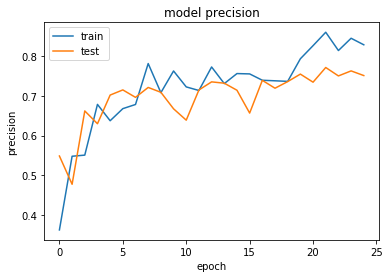

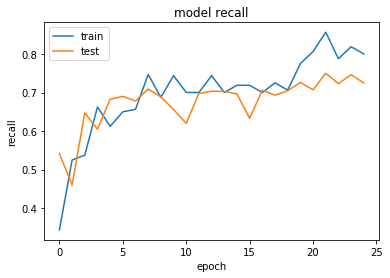

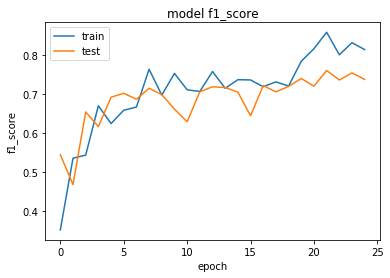

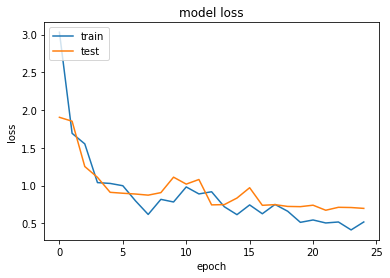

In [29]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**: Assim como na arquitetura VGG16, o modelo na VGG19 converge tanto no treino quanto nos testes. A perda (loss) diminui ao longo das épocas enquanto que a precisão, sensibilidade e pontuação f1 sobem. 

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

**Resposta**: Os valores de score obtido foram: 
* val_precision_score: 75,16% 
* val_recall_score: 72,47%
* val_f1_score: 73,77%

## 4.6 Compartivo de arquiteturas

Preencha a tabela abaixo com os valores dos indicadores de performance apresentados.

_O cálculo do F1-Score é dado por 2 * (Precisão * Sensibilidade) / (Precisão + Sensibilidade)._

| Modelo   | Precisão (*Precision*) | Sensibilidade (*Recall*) | F1-Score |
|----------|----------|---------------|----------|
| ResNet50 | 66,18%    | 57,77%       | 61,62% |
| VGG16    | 72,73% | 70,71%      | 71,69% |
| VGG19    | 75,16% | 72,47%      | 73,77% |

## 4.7 Conclusões

Analise os resultados da tabela de indicadores do comparativo de arquiteturas e explique os principais motivos pelos quais cada modelo obteve cada resultado.

**Respota**:
Com base nas arquiteturas utilizadas, segue as nossas considerações: 
* ResNet50: Precisaríamos rodar este modelo com data augmentation, muitas imagens estavam em baixa qualidade diminuindo a performance do modelo. Outro ponto interessante, é que este modelo performa muito bem com apenas duas classes. O qual indica, que as diferencas entre as classes viral e bacteria, precisariam de alguma extração de características para melhorar o modelo. 
* VGG16: Como a arquitetura visa extrair as características das imagens (filtros 3x3), o modelo performou melhor. Consegue encapsular a imagem e aplicar muitos filtros pré-convolução.
* VGG19: Como a arquitetura é uma versão evoluída da VGG16, ao acrescentar mais camadas performou menos devido ao desparecimento dos gradientes. Entretanto, se saiu melhor com a mesma quantidade de amostras que a ResNet50.

Exemplo da ResNet50 com data augmentation:

In [30]:
teste_de_argumento = ImageDataGenerator(validation_split=0.30,        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [31]:
treino_generator = teste_de_argumento.flow_from_directory(
    "raiox/",
    batch_size=32,
    class_mode="categorical",
    color_mode="rgb",
    target_size=(224,224),
    subset="training")

Found 3702 images belonging to 3 classes.


In [32]:
validacao_generator = teste_de_argumento.flow_from_directory(
    "raiox/",
    batch_size=32,
    class_mode="categorical",
    color_mode="rgb",
    target_size=(224,224),
    subset="validation")

Found 1584 images belonging to 3 classes.


In [33]:
qtde_classes = 3

conv_base = ResNet50(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

C:\Users\leonardo\anaconda3\envs\cvia\lib\site-packages\keras_applications\resnet50.py:263: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [34]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [35]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [36]:
## IMPLEMENTE

qtde_epocas = 10

In [37]:
history = model.fit_generator(generator=treino_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=validacao_generator)

Epoch 1/10
5/5 [==============================] - 28s 6s/step - loss: 1.2344 - precision_score: 0.4782 - recall_score: 0.3687 - f1_score: 0.4142 - val_loss: 1.2678 - val_precision_score: 0.4707 - val_recall_score: 0.4192 - val_f1_score: 0.4431
Epoch 2/10
5/5 [==============================] - 27s 5s/step - loss: 0.9355 - precision_score: 0.6449 - recall_score: 0.5125 - f1_score: 0.5691 - val_loss: 0.9043 - val_precision_score: 0.6490 - val_recall_score: 0.5202 - val_f1_score: 0.5766
Epoch 3/10
5/5 [==============================] - 27s 5s/step - loss: 0.6966 - precision_score: 0.7657 - recall_score: 0.6375 - f1_score: 0.6940 - val_loss: 1.0608 - val_precision_score: 0.5197 - val_recall_score: 0.4242 - val_f1_score: 0.4664
Epoch 4/10
5/5 [==============================] - 27s 5s/step - loss: 0.7237 - precision_score: 0.7237 - recall_score: 0.5687 - f1_score: 0.6361 - val_loss: 0.8278 - val_precision_score: 0.6318 - val_recall_score: 0.4760 - val_f1_score: 0.5413
Epoch 5/10
5/5 [========

resultado com 10 epocas usando data augumentation para criar novos examplares de fotos: 
* val_precision_score: 69,88% 
* val_recall_score: 56,57% 
* val_f1_score: 62,40%

## 4.8 Abordagem Extra

Considerando os outros classificadores, escolha outro que ainda não foi utilizado, implemente abaixo. Ao final compare os resultados e explique os resultados.

_Não se esquece de utilizar as importações adequadas para cada modelo.
A forma de implementação deve respeitar as mesmas condições como valor de split e quantidade de imagens para poder comparar os modelos._

In [38]:
#IMPLEMENTE
qtde_epocas = 25

conv_base = Xception (include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

In [39]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_5[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

In [40]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [41]:
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)

Epoch 1/25
5/5 [==============================] - 16s 3s/step - loss: 1.0379 - precision_score: 0.3696 - recall_score: 0.0938 - f1_score: 0.1337 - val_loss: 11.9771 - val_precision_score: 0.2563 - val_recall_score: 0.2563 - val_f1_score: 0.2563
Epoch 2/25
5/5 [==============================] - 16s 3s/step - loss: 0.8489 - precision_score: 0.8033 - recall_score: 0.3875 - f1_score: 0.5148 - val_loss: 11.8898 - val_precision_score: 0.2563 - val_recall_score: 0.2563 - val_f1_score: 0.2563
Epoch 3/25
5/5 [==============================] - 16s 3s/step - loss: 0.6723 - precision_score: 0.8027 - recall_score: 0.6562 - f1_score: 0.7201 - val_loss: 11.9476 - val_precision_score: 0.2563 - val_recall_score: 0.2563 - val_f1_score: 0.2563
Epoch 4/25
5/5 [==============================] - 16s 3s/step - loss: 0.6972 - precision_score: 0.8081 - recall_score: 0.5625 - f1_score: 0.6562 - val_loss: 11.9862 - val_precision_score: 0.2563 - val_recall_score: 0.2563 - val_f1_score: 0.2563
Epoch 5/25
5/5 [====

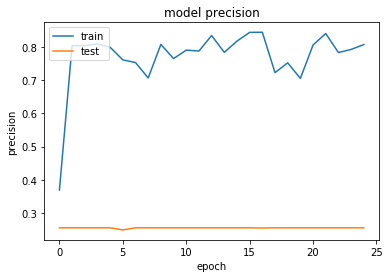

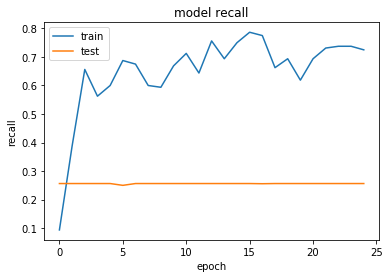

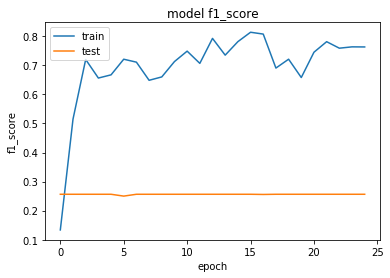

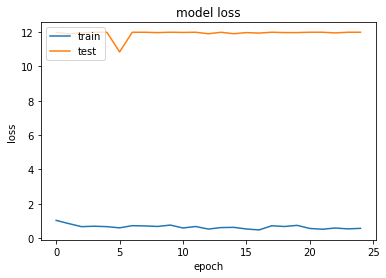

In [42]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 4.8.1 Conclusões sobre a abordagem extra

Como seu modelo performou em comparação com os demais modelos anteriores? Justifique sua resposta levando em consideração a arquitetura respectiva.

| Modelo   | Precisão (*Precision*) | Sensibilidade (*Recall*) | F1-Score |
|----------|----------|---------------|----------|
| ResNet50 | 66,18%    | 57,77%       | 61,62% |
| VGG16    | 72,73% | 70,71%      | 71,69% |
| VGG19    | 75,16% | 72,47%      | 73,77% |
|Xception  | 25,63% | 25,63%    | 25,63% |

**Resposta**:
Todos os modelos foram desenvolvidos visando o desafio da ImageNet, com o processamento em larga escala de imagens. 

O modelo Xception se baseia no GoogleLeNet, utilizando o **depthwise separable convolution**. O deptwise separable convolution, separa a imagem nas escalas de cores RGB aplicando as convoluções. A razão do modelo não ter performado é devido a ter apenas uma escala de cor predominante, conforme abaixo: 

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

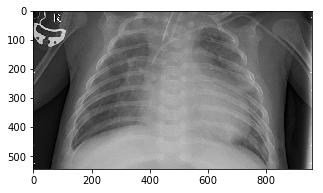

In [9]:
imagem_path = "raiox/pneumonia_viral/person1_virus_8.jpeg"
imagem = cv2.imread(imagem_path)
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5,10))
plt.imshow(imagem)

In [10]:
cores = {"r": 0, "g": 1, "b": 2}

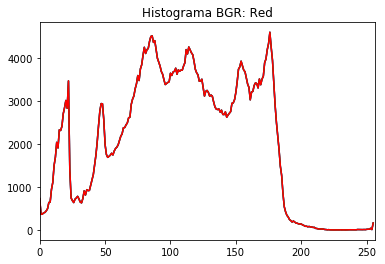

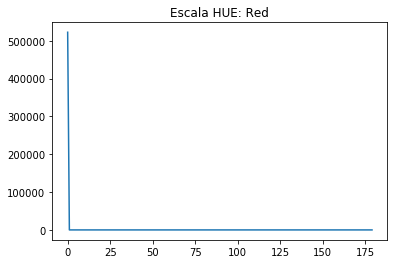

In [11]:
def histograma_bgr(imagem):
    for cor in cores:
        histograma = cv2.calcHist([imagem],[cores[cor]],None,[256],[0,256])
        plt.plot(histograma,color = cor)
        plt.xlim([0,256])
    plt.title('Histograma BGR: Red')
    plt.show()

def histograma_hue(imagem_hsv):
    imagem_hsv = cv2.cvtColor(imagem_hsv, cv2.COLOR_BGR2HSV)
    histograma_hue = cv2.calcHist([imagem_hsv], [0], None, [180], [0, 180])
    plt.plot(histograma_hue)
    plt.title('Escala HUE: Red')
    plt.show() 

histograma_bgr(imagem)
histograma_hue(imagem)

Como pode ser observado acima, a cor predominante na imagem é o vermelho. Convertendo as cores para Blue e Green, temos o seguinte resultado:

In [12]:
r, g, b = cv2.split(imagem)
imagem_vazia = np.zeros(imagem.shape[:2], dtype=np.uint8)

Text(0.5, 1.0, 'pneumonia_viral Blue')

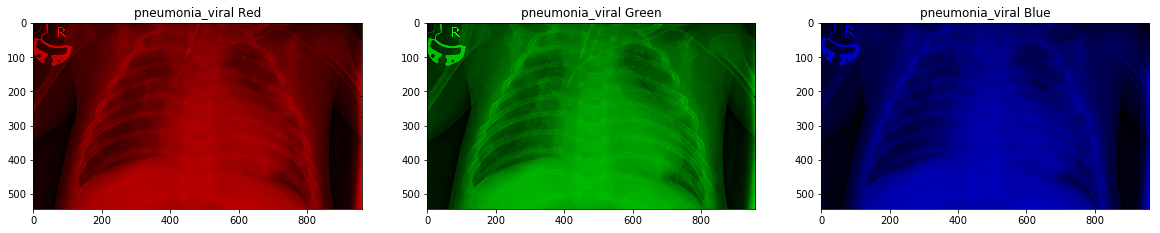

In [13]:
plt.figure(figsize=(20,20))

plt.subplot(1,3,1)
plt.imshow(cv2.merge([r, imagem_vazia, imagem_vazia]))
plt.title("pneumonia_viral Red")

plt.subplot(1,3,2)
plt.imshow(cv2.merge([imagem_vazia, g, imagem_vazia]))
plt.title("pneumonia_viral Green")

plt.subplot(1,3,3)
plt.imshow(cv2.merge([imagem_vazia, imagem_vazia, b]))
plt.title("pneumonia_viral Blue")

Podemos observar que a diferença entre os canais de cores, não ressalta as características **únicas** da pneumonia viral. Sendo assim, acreditamos que os resultados entre as convoluções usando o "depthwise separable convolution", não teve efeito devido a dificuldade em extrair as diferenças entre as imagens utilizando os canais de cores RGB.

Os demais modelos foram impactados da seguinte forma: 

* ResNet50: pequena quantidade de imagens para os casos normal e viral. Usando o data augumentation, conseguimos melhorar a performance do modelo. 
* VGG16 e VGG19: conseguiu extrair as características das imagens, já que utiliza muitos filtros entre as convoluções. Sendo assim, identificando com mais precisão as diferenças entre pneomonia bacterial e viral. 

Com o uso de filtros, com o propósito de suavizar as imagens usando 'blur' poderíamos melhorar o desempenho dos modelos. 

Abaixo, executamos um teste com data augumentation. Visando melhorar a performance do modelo Xception.

In [50]:
teste_de_argumento = ImageDataGenerator(validation_split=0.30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

Visualizando as alterações do data augumentation nas imagens, durante o processamento do modelo: 

In [51]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

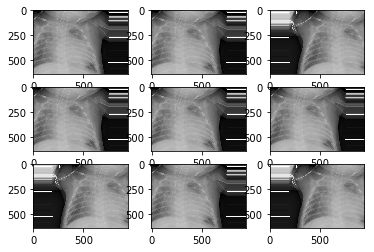

In [52]:
#width_shift_range=0.2
data = img_to_array(imagem)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(width_shift_range=[-0.2,0.2])
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

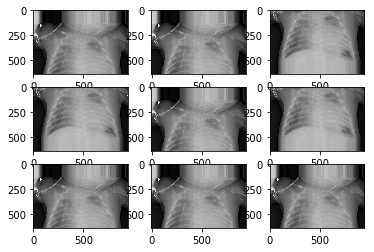

In [53]:
#height_shift_range=0.2
data = img_to_array(imagem)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(height_shift_range=[-0.2,0.2])
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

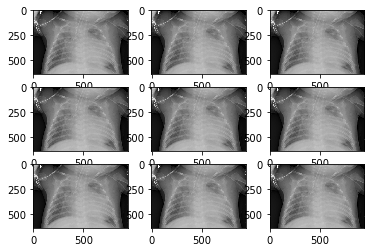

In [54]:
#shear_range=0.2
data = img_to_array(imagem)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(shear_range=0.2)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

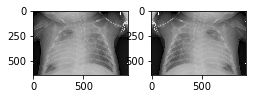

In [55]:
#horizontal_flip=True
data = img_to_array(imagem)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(horizontal_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(2):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

In [56]:
treino_generator = teste_de_argumento.flow_from_directory(
    "raiox",
    batch_size=32,
    class_mode="categorical",
    color_mode="rgb",
    target_size=(224,224),
    interpolation='bicubic',
    subset="training")

Found 3702 images belonging to 3 classes.


In [57]:
validacao_generator = teste_de_argumento.flow_from_directory(
    "raiox",
    batch_size=32,
    class_mode="categorical",
    color_mode="rgb",
    target_size=(224,224),
    interpolation='bicubic',
    subset="validation")

Found 1584 images belonging to 3 classes.


Visualizando a interpolação bicubic na imagem: 

Text(0.5, 1.0, 'Ampliação Cúbica')

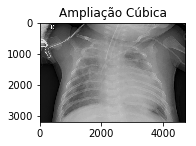

In [58]:
fator_x=5
fator_y=5
imagem_nova_cubica = cv2.resize(imagem, None, fx=fator_x, fy=fator_y, interpolation=cv2.INTER_CUBIC)
plt.subplot(2,2,2)
plt.imshow(imagem_nova_cubica)
plt.title("Ampliação Cúbica")

In [59]:
qtde_classes = 3
conv_base = Xception (include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

In [60]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_6[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

In [61]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [62]:
history = model.fit_generator(generator=treino_generator, 
                              epochs=5, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=validacao_generator)

Epoch 1/5
5/5 [==============================] - 38s 8s/step - loss: 1.0095 - precision_score: 0.5931 - recall_score: 0.1938 - f1_score: 0.2885 - val_loss: 7.3629 - val_precision_score: 0.4385 - val_recall_score: 0.4381 - val_f1_score: 0.4383
Epoch 2/5
5/5 [==============================] - 38s 8s/step - loss: 0.8827 - precision_score: 0.7194 - recall_score: 0.3697 - f1_score: 0.4716 - val_loss: 8.9460 - val_precision_score: 0.4444 - val_recall_score: 0.4444 - val_f1_score: 0.4444
Epoch 3/5
5/5 [==============================] - 38s 8s/step - loss: 0.8815 - precision_score: 0.7021 - recall_score: 0.4875 - f1_score: 0.5713 - val_loss: 5.5675 - val_precision_score: 0.4715 - val_recall_score: 0.4691 - val_f1_score: 0.4703
Epoch 4/5
5/5 [==============================] - 146s 29s/step - loss: 0.7455 - precision_score: 0.7686 - recall_score: 0.5625 - f1_score: 0.6474 - val_loss: 8.7497 - val_precision_score: 0.4407 - val_recall_score: 0.4407 - val_f1_score: 0.4407
Epoch 5/5
5/5 [===========

Com data augumentation e usando a interpolação de imagens bicubic, tivemos o ganho de 20% no modelo. Conforme: 

| Modelo   | Precisão (*Precision*) | Sensibilidade (*Recall*) | F1-Score |
|----------|----------|---------------|----------|
|Xception  | 25,63% | 25,63%    | 25,63% |
|Xception Data Augumentation |45,64% | 45,64% | 45,64%|


Por mais que tenhamos o "melhor" modelo, quando se trata de redes neurais profundas para analise de imagens. A qualidade da imagem, e a quantidade de amostras impactam diretamente na performance do modelo. Ao aplicar no cenário da saúde onde a margem de erro deve ser mínima, precisamos de profissionais da área medica que nos ajuste a identificar as caracteristicas, buscar a extração  dessas áreas de interesse e assim, executar o modelo. Portanto, neste case a quantidade de amostras e o pre processamento impactaram diretamente na performance.  